# This program contains monthly climatology calculation and plot over indian region for 2016 and 2019 year

### This plot contains 5 atmospheric parameters. 4 downloaded from ncep(2.5x2.5) and rainfall is imd merged data (1x1). 

##### Program writer: Chandrima Chakrabarty

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib import cm
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [4]:
rain=xr.open_dataset('D:/pai/data/monthlymean/imdrainfall_MERGED_DATA_S_ASIA_1982_2019.nc')
u = xr.open_dataset('D:/pai/data/monmean_surface/uwnd.mon.mean.nc')
v = xr.open_dataset('D:/pai/data/monmean_surface/vwnd.mon.mean.nc')
slp= xr.open_dataset('D:/pai/data/monmean_surface/slp.mon.mean.nc')
T= xr.open_dataset('D:/pai/data/monmean_surface/air.mon.mean.nc')

#### selecting 2016 and 2019 monthly data from original dataset

In [5]:
r_2016=rain.sel(time=slice('2016-01-01','2016-12-31'))
r_2019=rain.sel(time=slice('2019-01-01','2019-12-31'))

u_2016=u.sel(time=slice('2016-01-01','2016-12-31'))
u_2019=u.sel(time=slice('2019-01-01','2019-12-31'))

v_2016=v.sel(time=slice('2016-01-01','2016-12-31'))
v_2019=v.sel(time=slice('2019-01-01','2019-12-31'))

slp_2016=slp.sel(time=slice('2016-01-01','2016-12-31'))
slp_2019=slp.sel(time=slice('2019-01-01','2019-12-31'))

T_2016=T.sel(time=slice('2016-01-01','2016-12-31'))
T_2019=T.sel(time=slice('2019-01-01','2019-12-31'))

In [6]:
r_2019.to_netcdf('D:/pai/data/monmean_surface/rain_monmean_imd_merged_1x1_2019.nc')
u_2019.to_netcdf('D:/pai/data/monmean_surface/uwnd_monmean_ncep_2.5x2.5_2019.nc')
v_2019.to_netcdf('D:/pai/data/monmean_surface/vwnd_monmean_ncep_2.5x2.5_2019.nc')
slp_2019.to_netcdf('D:/pai/data/monmean_surface/slp_monmean_ncep_2.5x2.5_2019.nc')
T_2019.to_netcdf('D:/pai/data/monmean_surface/airT_monmean_ncep_2.5x2.5_2019.nc')

### *********************** plots for 2016****************************

In [78]:
lon_r = r_2016.LONGITUDE
lat_r = r_2016.LATITUDE
lon_w = u_2016.lon
lat_w = u_2016.lat
lon_p = slp_2016.lon
lat_p = slp_2016.lat
lon_T = T_2016.lon
lat_T = T_2016.lat

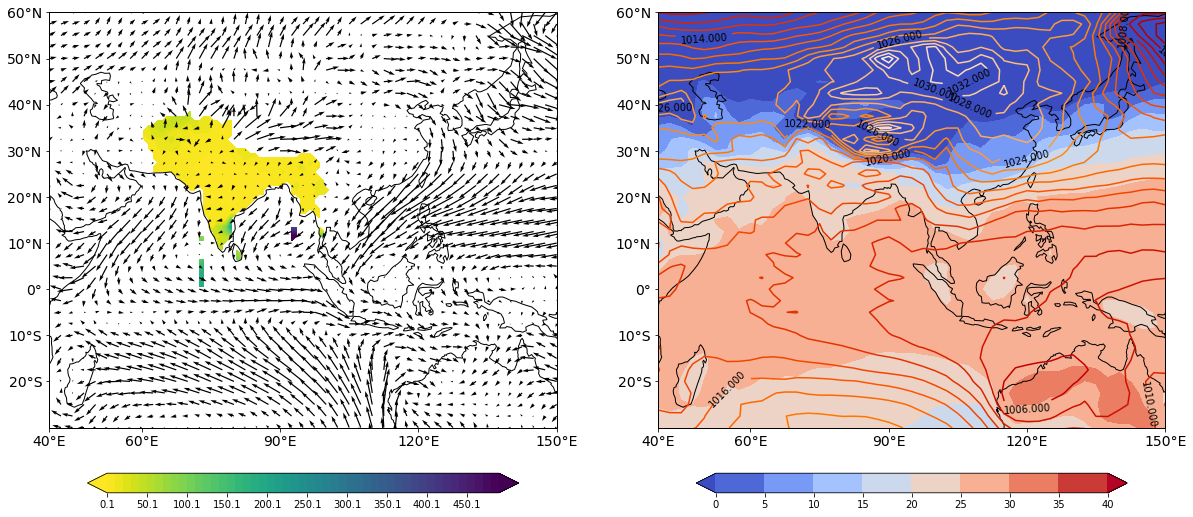

In [79]:
def climatology_2016(time):
    
    fig=plt.figure(figsize=[20,12])
    ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())     #subplot 1 with only 1 frame ,plot projecttion
    ax2 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())

    level1=np.arange(0.1,500,10)                                    #set your plot level
    level2=np.arange(0,45,5)
    shrink=0.85
    img_extent =[40, 150, -30, 40]                                #decide region
#**********************************************************************

    ax1.set_extent(img_extent, ccrs.PlateCarree())                 #set the required region
    
    ax1.coastlines()                                               #add boundary
    ax1.set_xticks([40,60,90,120,150], crs=ccrs.PlateCarree())        # decide xaxis ticks, for projection: https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html
    ax1.set_yticks([ -20,-10, 0,10, 20,30,40, 50, 60], crs=ccrs.PlateCarree())  #decide y axis levels
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)
    ax1.tick_params(axis='both',labelsize=14)                      #decides tick's size

    c = ax1.contourf(lon_r, lat_r, r_2016.rf[10,:,:], extent=img_extent, cmap=cm.viridis_r         #plot spacial
                ,levels=level1,extend='both',transform=ccrs.PlateCarree())


    q = ax1.quiver(lon_w,lat_w,u_2016.uwnd[10,:,:],v_2016.vwnd[10,:,:],cmap=cm.Blues,scale=200)           #plot wind   


    plt.colorbar(c,pad=0.07,ax=ax1,shrink=shrink,orientation='horizontal')    #put the level bar
#************************************************************************

 
    ax2.set_extent(img_extent, ccrs.PlateCarree())                 #set the required region

    ax2.coastlines()                                               #add boundary
    ax2.set_xticks([40,60,90,120,150], crs=ccrs.PlateCarree())        # decide xaxis ticks, for projection: https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html
    ax2.set_yticks([ -20,-10, 0,10, 20,30,40, 50, 60], crs=ccrs.PlateCarree())  #decide y axis levels
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax2.xaxis.set_major_formatter(lon_formatter)
    ax2.yaxis.set_major_formatter(lat_formatter)
    ax2.tick_params(axis='both',labelsize=14)   


    p = ax2.contour(lon_p,lat_p,slp_2016.slp[10,:,:], 30,extent=img_extent,cmap="gist_heat")
    plt.clabel(p, inline=True, fontsize=10, colors='black')


    T= ax2.contourf(lon_T, lat_T, T_2016.air[10,:,:],extend='both',extent=img_extent,levels=level2,cmap="coolwarm"
                   ,transform=ccrs.PlateCarree())


    plt.colorbar(T,pad=0.07,ax=ax2,shrink=shrink,orientation='horizontal')    #put the level bar


In [80]:
fig.savefig('2016_dec_clim.png')

### *********************** plots for 2019****************************

In [81]:
lon_r = r_2019.LONGITUDE
lat_r = r_2019.LATITUDE
lon_w = u_2019.lon
lat_w = u_2019.lat
lon_p = slp_2019.lon
lat_p = slp_2019.lat
lon_T = T_2019.lon
lat_T = T_2019.lat

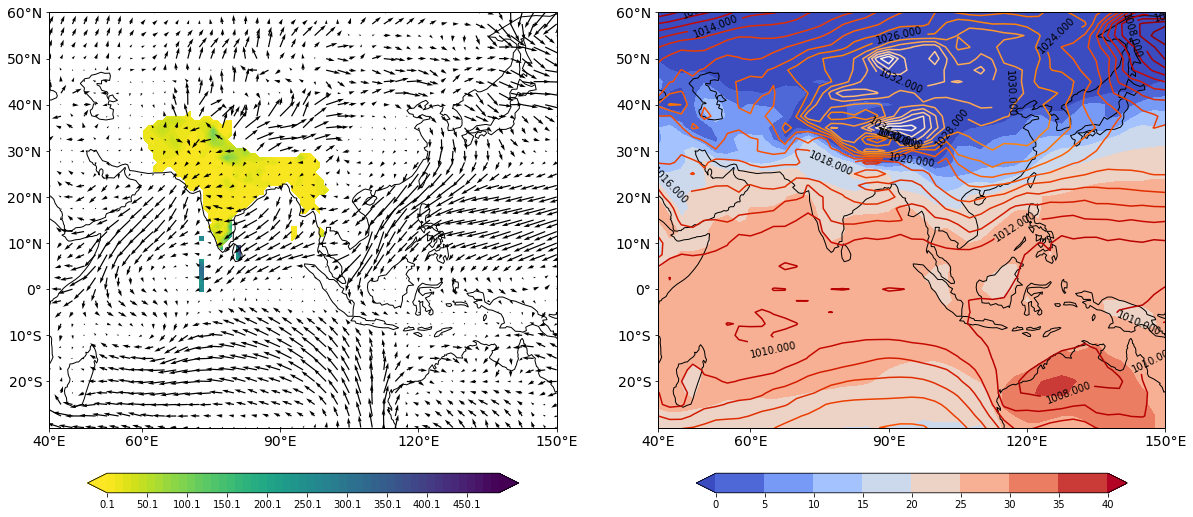

In [82]:
fig=plt.figure(figsize=[20,12])
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())     #subplot 1 with only 1 frame ,plot projecttion
ax2 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())

level1=np.arange(0.1,500,10)                                    #set your plot level
level2=np.arange(0,45,5)
shrink=0.85
img_extent =[40, 150, -30, 40]                                #decide region
#**********************************************************************

ax1.set_extent(img_extent, ccrs.PlateCarree())                 #set the required region

ax1.coastlines()                                               #add boundary
ax1.set_xticks([40,60,90,120,150], crs=ccrs.PlateCarree())        # decide xaxis ticks, for projection: https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html
ax1.set_yticks([ -20,-10, 0,10, 20,30,40, 50, 60], crs=ccrs.PlateCarree())  #decide y axis levels
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.tick_params(axis='both',labelsize=14)                      #decides tick's size

c = ax1.contourf(lon_r, lat_r, r_2019.rf[11,:,:], extent=img_extent, cmap=cm.viridis_r         #plot spacial
            ,levels=level1,extend='both',transform=ccrs.PlateCarree())


q = ax1.quiver(lon_w,lat_w,u_2019.uwnd[11,:,:],v_2019.vwnd[11,:,:],cmap=cm.Blues,scale=200)           #plot wind   


plt.colorbar(c,pad=0.07,ax=ax1,shrink=shrink,orientation='horizontal')    #put the level bar
#************************************************************************

 
ax2.set_extent(img_extent, ccrs.PlateCarree())                 #set the required region

ax2.coastlines()                                               #add boundary
ax2.set_xticks([40,60,90,120,150], crs=ccrs.PlateCarree())        # decide xaxis ticks, for projection: https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html
ax2.set_yticks([ -20,-10, 0,10, 20,30,40, 50, 60], crs=ccrs.PlateCarree())  #decide y axis levels
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.tick_params(axis='both',labelsize=14)   


p = ax2.contour(lon_p,lat_p,slp_2019.slp[11,:,:], 30,extent=img_extent,cmap="gist_heat")
plt.clabel(p, inline=True, fontsize=10, colors='black')


T= ax2.contourf(lon_T, lat_T, T_2019.air[11,:,:],extend='both',extent=img_extent,levels=level2,cmap="coolwarm"
               ,transform=ccrs.PlateCarree())


plt.colorbar(T,pad=0.07,ax=ax2,shrink=shrink,orientation='horizontal')    #put the level bar


In [83]:
fig.savefig('2019_dec_clim.png')